# Boston House Price Prediction Using Machine Learning

The data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston. Our goal is to develop a model that has the capacity of predicting the value of houses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

color_pal = sns.color_palette()
sns.set()

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(data.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# the median value of owner-occupied homes (in $1000's) is our target feature
# the target values are defined as a numpy array (as illustrated below)

In [9]:
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [10]:
boston_features = data.feature_names

In [11]:
# framing up the dataset
boston_df = pd.DataFrame(data=data.data,
                         columns=boston_features)

In [12]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
# the target feature is not included in pour dataset
# so we will be adding the same labelled as 'Price'

In [14]:
boston_df['Price'] = data.target

In [15]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [16]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [17]:
boston_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### FEATURE OBSERVATION
Data Science is the process of making some assumptions and hypothesis on the data, and testing them by performing some tasks. Initially we could make the following intuitive assumptions for each feature:

- Houses with more rooms (*higher ‘RM’ value*) will worth more. Usually houses with more rooms are bigger and can fit more people, so it is reasonable that they cost more money. They are *directly proportional* variables.
- Neighborhoods with more lower class workers (*higher ‘LSTAT’ value*) will worth less. If the percentage of lower working class people is higher, it is likely that they have low purchasing power and therefore, they houses will cost less. They are *inversely proportional* variables.
- Neighborhoods with more students to teachers ratio (*higher ‘PTRATIO’ value*) will be worth less. If the percentage of students to teachers ratio people is higher, it is likely that in the neighborhood there are less schools, this could be because there is less tax income which could be because in that neighborhood people earn less money. If people earn less money it is likely that their houses are worth less. They are *inversely proportional* variables.

We’ll find out if these assumptions are correct through the project.

### DATA EXPLORATION

In [18]:
house_price = boston_df['Price']

# minimum price of the data
minimum_price = np.amin(house_price)*1000

# maximum price of the data
maximum_price = np.amax(house_price)*1000

# mean price of the data
mean_price = np.mean(house_price)*1000

# median price of the data
median_price = np.median(house_price)*1000

# standard deviation of prices of the data
std_price = np.std(house_price)*1000

# displaying the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price: ${}".format(median_price))
print("Standard deviation of price: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5000.0
Maximum price: $50000.0
Mean price: $22532.806324110676
Median price: $21200.0
Standard deviation of price: $9188.011545278203


<AxesSubplot:xlabel='CHAS', ylabel='count'>

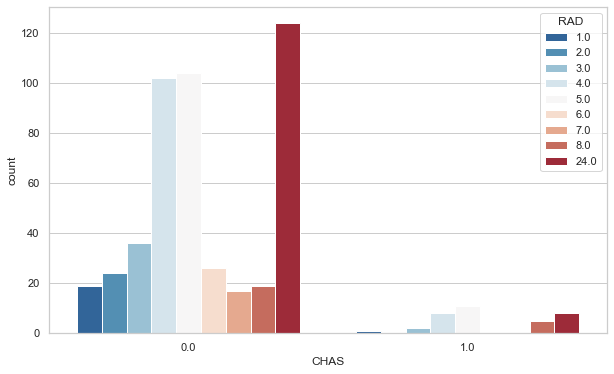

In [19]:
# analyzing the accessibility to radial highways for plots bounded by river vs. the ones that do not have any rivers bounding them

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='CHAS', hue='RAD', data=boston_df, palette='RdBu_r')

In [20]:
# CHAS (Charles River) dummy variable is the only categorical feature in our dataframe
# it equals 1 if tract bounds river else the value is denoted as 0

<AxesSubplot:xlabel='AGE', ylabel='Density'>

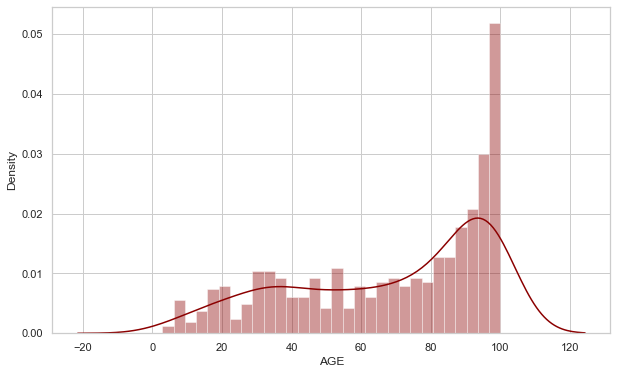

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(boston_df['AGE'].dropna(),
             kde=True, color='darkred',
             bins=30)

### I. REGRESSION PLOTS FOR ANALYSING THE TARGET DEPENDENCY ON FEATURES

Text(0.5, 1.0, 'AGE vs. PRICE')

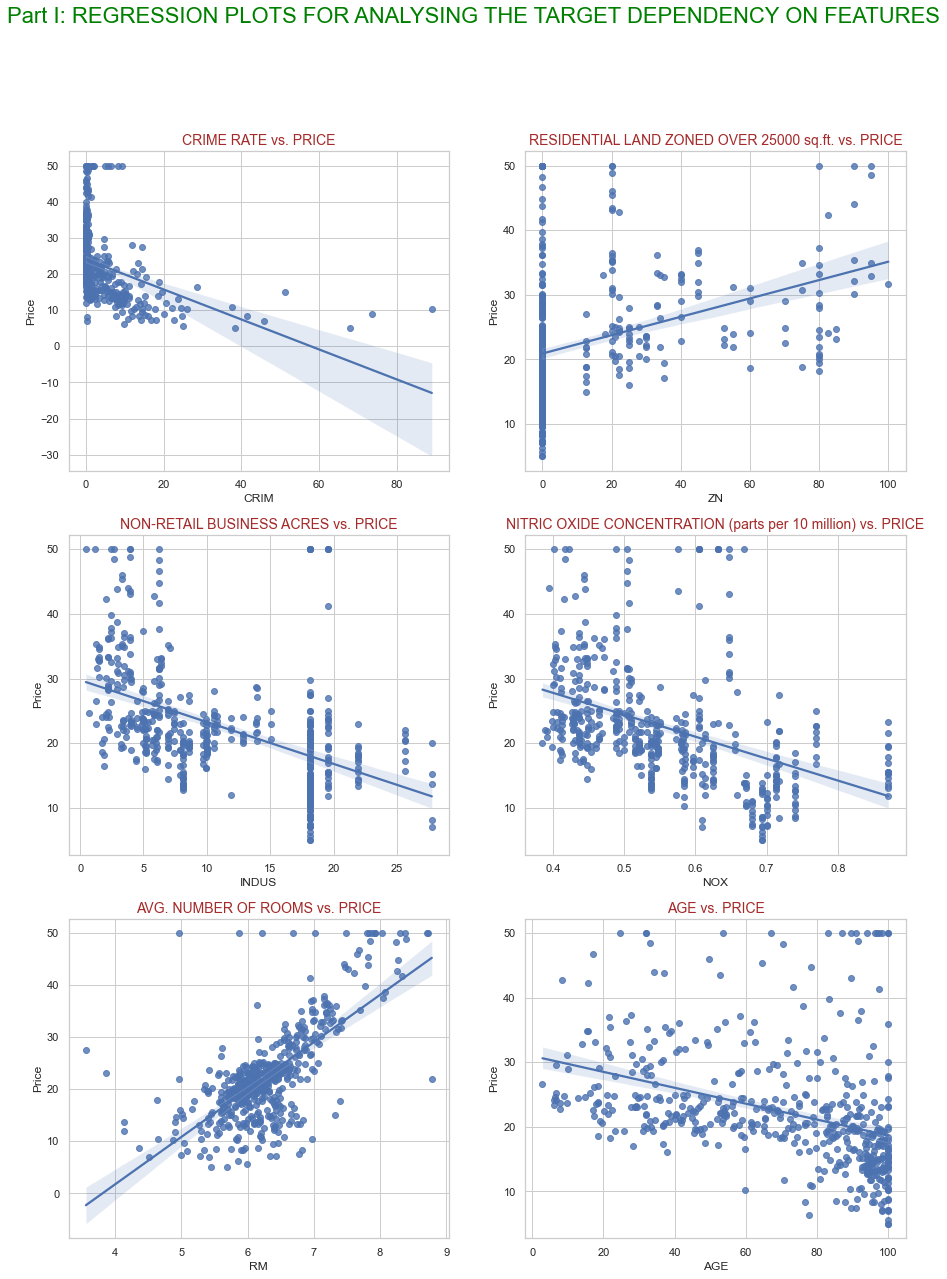

In [22]:
fig, sub = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
fig.suptitle('Part I: REGRESSION PLOTS FOR ANALYSING THE TARGET DEPENDENCY ON FEATURES', c='green', size=22)

sns.regplot(x='CRIM', y='Price', data=boston_df, ax=sub[0][0])
sub[0][0].set_title('CRIME RATE vs. PRICE', c='brown', size=14)

sns.regplot(x='ZN', y='Price', data=boston_df, ax=sub[0][1])
sub[0][1].set_title('RESIDENTIAL LAND ZONED OVER 25000 sq.ft. vs. PRICE', c='brown', size=14)

sns.regplot(x='INDUS', y='Price', data=boston_df, ax=sub[1][0])
sub[1][0].set_title('NON-RETAIL BUSINESS ACRES vs. PRICE', c='brown', size=14)

sns.regplot(x='NOX', y='Price', data=boston_df, ax=sub[1][1])
sub[1][1].set_title('NITRIC OXIDE CONCENTRATION (parts per 10 million) vs. PRICE', c='brown', size=14)

sns.regplot(x='RM', y='Price', data=boston_df, ax=sub[2][0])
sub[2][0].set_title('AVG. NUMBER OF ROOMS vs. PRICE', c='brown', size=14)

sns.regplot(x='AGE', y='Price', data=boston_df, ax=sub[2][1])
sub[2][1].set_title('AGE vs. PRICE', c='brown', size=14)

Text(0.5, 1.0, 'PERCENTAGE OF LOWER STATUS vs. PRICE')

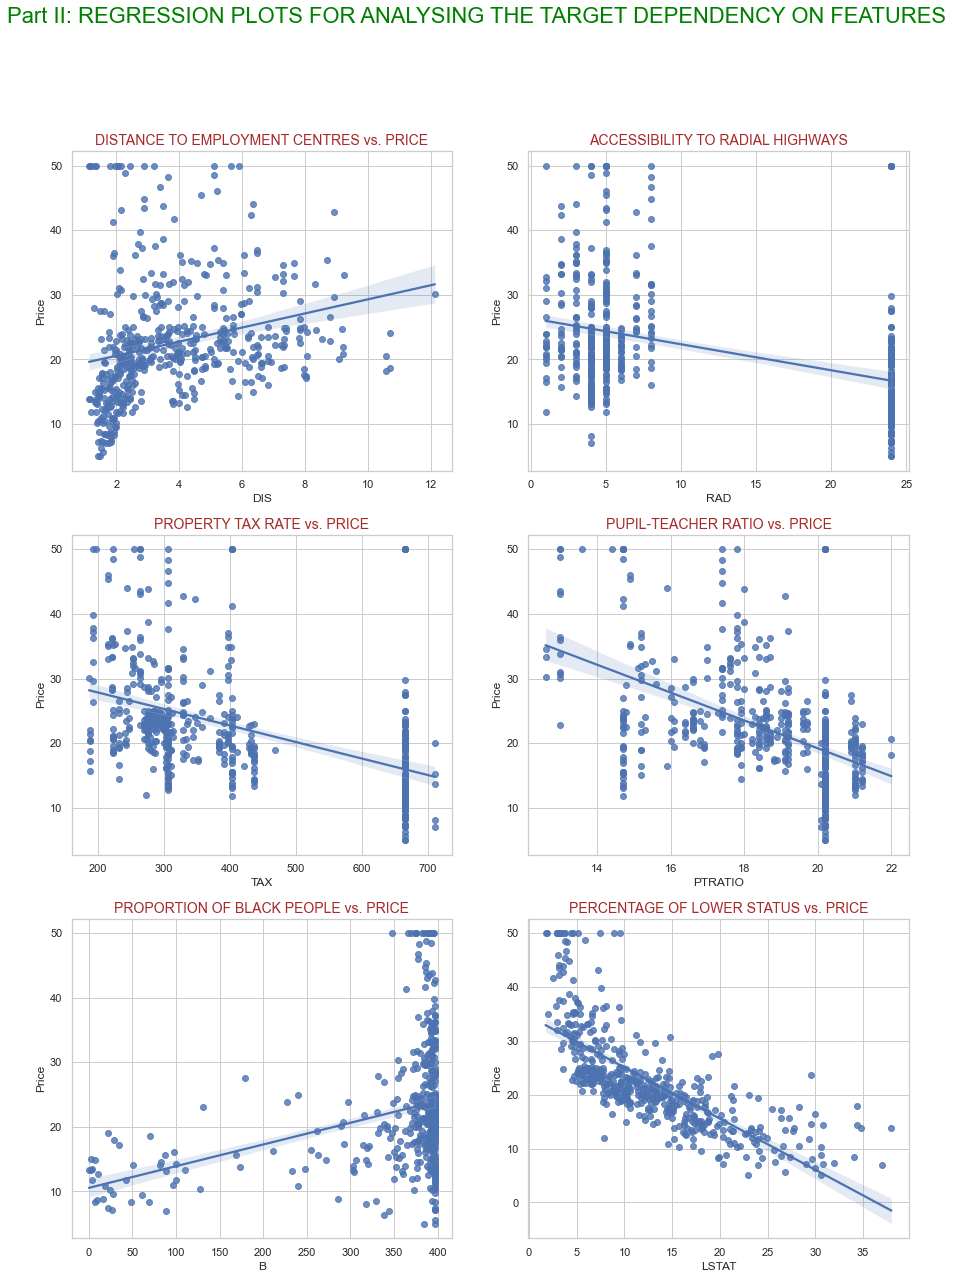

In [23]:
fig, sub = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
fig.suptitle('Part II: REGRESSION PLOTS FOR ANALYSING THE TARGET DEPENDENCY ON FEATURES', c='green', size=22)

sns.regplot(x='DIS', y='Price', data=boston_df, ax=sub[0][0])
sub[0][0].set_title('DISTANCE TO EMPLOYMENT CENTRES vs. PRICE', c='brown', size=14)

sns.regplot(x='RAD', y='Price', data=boston_df, ax=sub[0][1])
sub[0][1].set_title('ACCESSIBILITY TO RADIAL HIGHWAYS', c='brown', size=14)

sns.regplot(x='TAX', y='Price', data=boston_df, ax=sub[1][0])
sub[1][0].set_title('PROPERTY TAX RATE vs. PRICE', c='brown', size=14)

sns.regplot(x='PTRATIO', y='Price', data=boston_df, ax=sub[1][1])
sub[1][1].set_title('PUPIL-TEACHER RATIO vs. PRICE', c='brown', size=14)

sns.regplot(x='B', y='Price', data=boston_df, ax=sub[2][0])
sub[2][0].set_title('PROPORTION OF BLACK PEOPLE vs. PRICE', c='brown', size=14)

sns.regplot(x='LSTAT', y='Price', data=boston_df, ax=sub[2][1])
sub[2][1].set_title('PERCENTAGE OF LOWER STATUS vs. PRICE', c='brown', size=14)

STATISTICS DESCRIBING IF THE TRACT BOUNDS RIVER CHARLES OR NOT
Percentage of tracts bounding the river: 35
Percentage of tracts that do not bound the river: 471


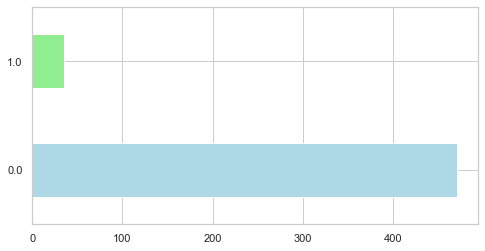

In [24]:
boston_df['CHAS'].value_counts().plot(kind='barh',
                                     figsize=(8,4),
                                     color=['lightblue', 'lightgreen'],
                                     edgecolor='white')
print('STATISTICS DESCRIBING IF THE TRACT BOUNDS RIVER CHARLES OR NOT')
print('Percentage of tracts bounding the river:', boston_df[boston_df['CHAS'] == 1]['CHAS'].value_counts()[1.0])
print('Percentage of tracts that do not bound the river:', boston_df[boston_df['CHAS'] == 0]['CHAS'].value_counts()[0.0])

### II. EVALUATING THE CORRELATION BETWEEN THE FEATURES AND TARGET VARIABLE

<AxesSubplot:>

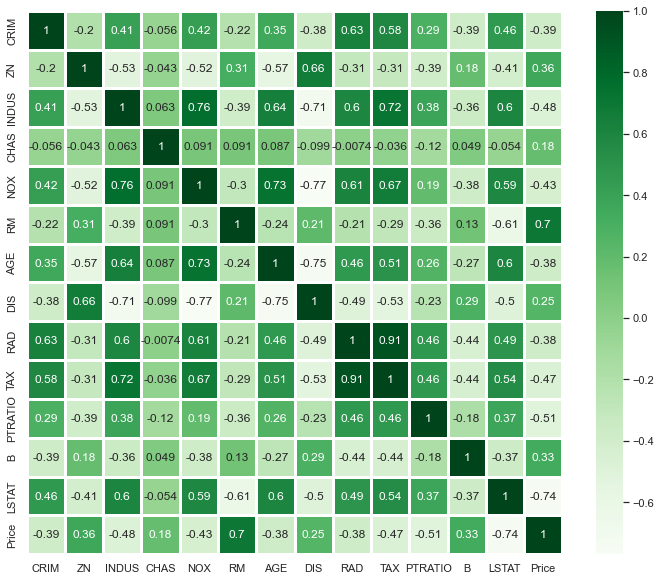

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(boston_df.corr(),
            annot=True,
            linewidths=3,
            linecolor='white',
            cmap='Greens')

### III. ANALYZING THE OUTLIERS FOR EACH FEATURE

Text(0.5, 1.0, 'Proportion of owner-occupied units built prior to 1940')

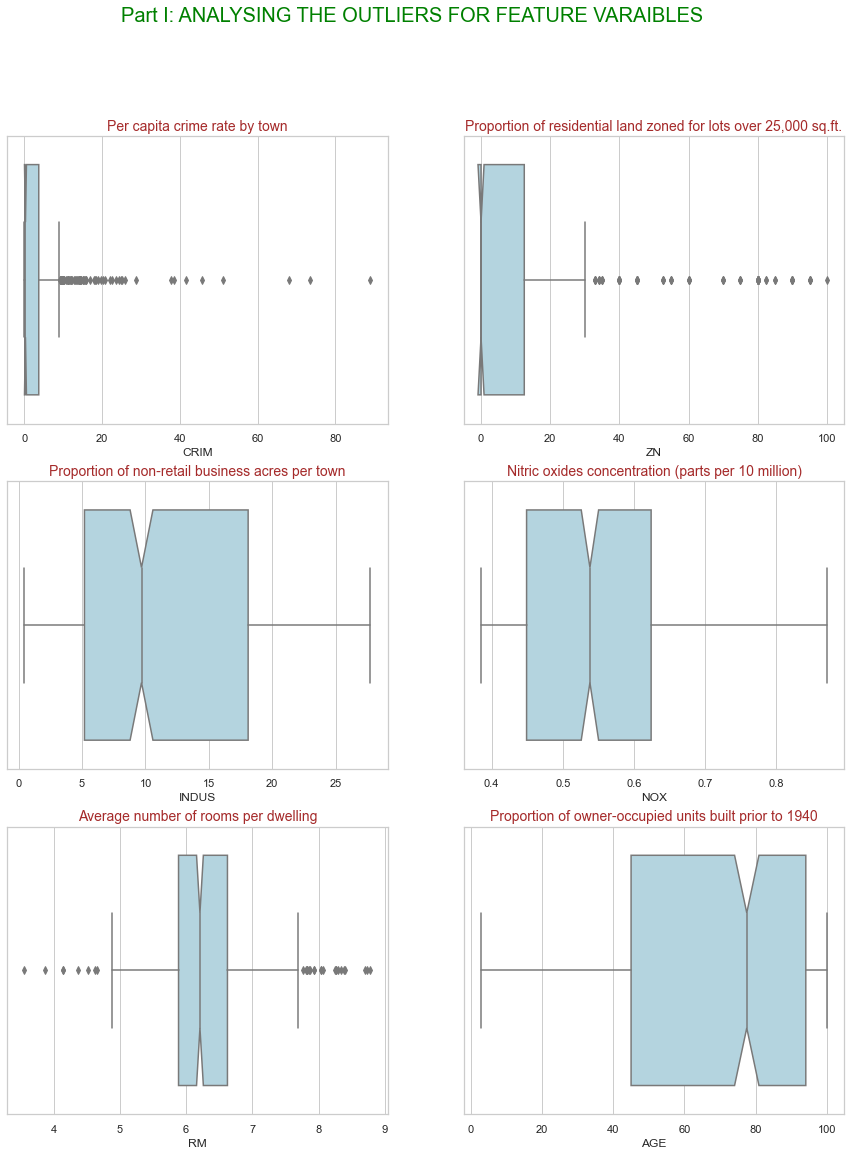

In [26]:
fig, sub = plt.subplots(nrows=3, ncols=2, figsize=(15,18))
fig.suptitle('Part I: ANALYSING THE OUTLIERS FOR FEATURE VARAIBLES', c='green', size=20)

sns.boxplot(x=boston_df.CRIM, ax=sub[0][0], color='lightblue', notch=True)
sub[0][0].set_title('Per capita crime rate by town', c='brown', size=14)

sns.boxplot(x=boston_df.ZN, ax=sub[0][1], color='lightblue', notch=True)
sub[0][1].set_title('Proportion of residential land zoned for lots over 25,000 sq.ft.', c='brown', size=14)

sns.boxplot(x=boston_df.INDUS, ax=sub[1][0], color='lightblue', notch=True)
sub[1][0].set_title('Proportion of non-retail business acres per town', c='brown', size=14)

sns.boxplot(x=boston_df.NOX, ax=sub[1][1], color='lightblue', notch=True)
sub[1][1].set_title('Nitric oxides concentration (parts per 10 million)', c='brown', size=14)

sns.boxplot(x=boston_df.RM, ax=sub[2][0], color='lightblue', notch=True)
sub[2][0].set_title('Average number of rooms per dwelling', c='brown', size=14)

sns.boxplot(x=boston_df.AGE, ax=sub[2][1], color='lightblue', notch=True)
sub[2][1].set_title('Proportion of owner-occupied units built prior to 1940', c='brown', size=14)

Text(0.5, 1.0, 'Percentage of lower status of the population')

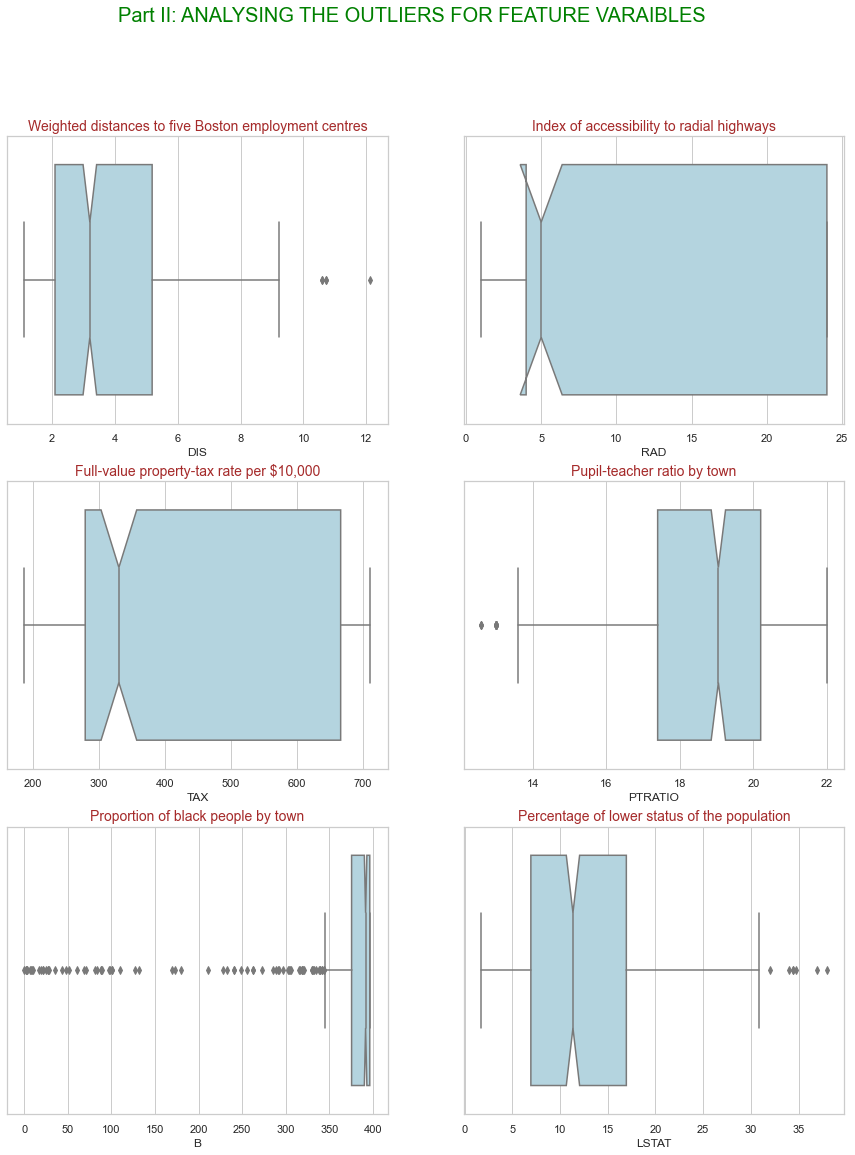

In [27]:
fig, sub = plt.subplots(nrows=3, ncols=2, figsize=(15,18))
fig.suptitle('Part II: ANALYSING THE OUTLIERS FOR FEATURE VARAIBLES', c='green', size=20)

sns.boxplot(x=boston_df.DIS, ax=sub[0][0], color='lightblue', notch=True)
sub[0][0].set_title('Weighted distances to five Boston employment centres', c='brown', size=14)

sns.boxplot(x=boston_df.RAD, ax=sub[0][1], color='lightblue',notch=True)
sub[0][1].set_title('Index of accessibility to radial highways', c='brown', size=14)

sns.boxplot(x=boston_df.TAX, ax=sub[1][0], color='lightblue',notch=True)
sub[1][0].set_title('Full-value property-tax rate per $10,000', c='brown', size=14)

sns.boxplot(x=boston_df.PTRATIO, ax=sub[1][1], color='lightblue',notch=True)
sub[1][1].set_title('Pupil-teacher ratio by town', c='brown', size=14)

sns.boxplot(x=boston_df.B, ax=sub[2][0], color='lightblue',notch=True)
sub[2][0].set_title('Proportion of black people by town', c='brown', size=14)

sns.boxplot(x=boston_df.LSTAT, ax=sub[2][1], color='lightblue', notch=True)
sub[2][1].set_title('Percentage of lower status of the population', c='brown', size=14)

In [28]:
# on visualizing the graphs as illustrated above
# we could notice the presence of outliers in few of the feature variables namely:

## - CRIM     : per capita crime rate by town
## - ZN       : proportion of residential land zoned for lots over 25,000 sq.ft.
## - RM       : average number of rooms per dwelling
## - DIS      : weighted distances to five Boston employment centres
## - PTRATIO  : pupil-teacher ratio by town
## - B        : proportion of black people by town
## - LSTAT    : percentage of lower status of the population

In [29]:
# outliers for 'percentage of lower status of the population'
boston_df[boston_df['LSTAT'] > 32]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02,8.4


In [30]:
# outliers for 'pupil-teacher ratio by town'
boston_df[boston_df['PTRATIO'] < 13]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.309,2.0,329.0,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.309,2.0,329.0,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.309,2.0,329.0,12.6,392.20,6.62,34.6


In [31]:
# outliers for 'weighted distances to five Boston employment centres'
boston_df[boston_df['DIS'] > 10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6


In [32]:
# outliers for 'proportion of black people by town'
boston_df[boston_df['B'] < 340]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.16360,0.0,18.10,0.0,0.655,5.759,48.2,3.0665,24.0,666.0,20.2,334.40,14.13,19.9
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15,19.0
467,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24.0,666.0,20.2,331.29,21.32,19.1
475,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10,13.3


In [33]:
# outliers for 'average number of rooms per dwelling'
boston_df[(boston_df['RM'] < 4.8) | (boston_df['RM'] > 7.6)].head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56,39.8
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
202,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5


In [34]:
# outliers for 'proportion of residential land zoned for lots over 25,000 sq.ft.'
boston_df[boston_df['ZN'] > 30]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,30.8
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2


In [35]:
# outliers for 'per capita crime rate by town'
boston_df[boston_df['CRIM'] > 10].head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
367,13.5222,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
373,11.1081,0.0,18.1,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
376,15.2880,0.0,18.1,0.0,0.671,6.649,93.3,1.3449,24.0,666.0,20.2,363.02,23.24,13.9
378,23.6482,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69,13.1
379,17.8667,0.0,18.1,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
381,15.8744,0.0,18.1,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08,10.9
384,20.0849,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8


<AxesSubplot:>

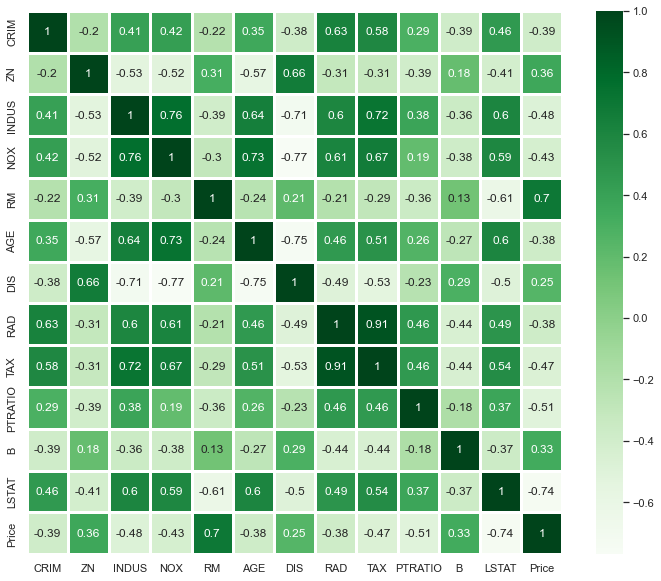

In [36]:
# checking for correlation amongst the features having outliers (including target variable)

plt.figure(figsize=(12,10))
sns.heatmap(boston_df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']].corr(),
            annot=True,
            linewidths=3,
            linecolor='white',
            cmap='Greens')

**Analysis**:
There is a strong correlation between feature variables RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate per $10,000). The correlation coefficient is **0.91** which indicates that the *houses having a greater index of accessibility to radial highways have a greater tax rate*. Hence for dealing with the outliers within these two features we could compare the corresponding values (outliers) and see how they are mapped onto each other. Other observations:
- CRIM (per capita crime rate by town) correlation against TAX: **0.58**
- INDUS (proportion of non-retail business acres per town) correlation against TAX: **0.72**
- NOX (nitric oxides concentration in parts per 10 million) correlation against TAX: **0.67**
- AGE (proportion of owner-occupied units built prior to 1940) correlation against TAX: **0.51**

### IV. SPLITTING THE DATASET INTO FEATURES AND TARGET

In [37]:
X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]

In [38]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

### V. MODEL TRAINING

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# splitting the data into train data & test data (70%:30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=85)

In [41]:
print('Shape of training dataset (features):', X_train.shape)
print('Shape of training dataset (target):', y_train.shape)
print('Shape of test dataset (features):', X_test.shape)
print('Shape of test dataset (target):', y_test.shape)

Shape of training dataset (features): (354, 13)
Shape of training dataset (target): (354,)
Shape of test dataset (features): (152, 13)
Shape of test dataset (target): (152,)


#### PART I: APPLYING LINEAR REGRESSION ALGORITHM TO THE NON-SCALED DATA

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# evaluating the importance for each of the features over the target variable
lr.coef_

array([-9.85328160e-02,  5.03087260e-02,  1.38610542e-02,  2.02273187e+00,
       -2.33536427e+01,  2.99627556e+00,  3.54364290e-02, -1.56710431e+00,
        3.48843211e-01, -1.28951744e-02, -1.03003029e+00,  8.44406544e-03,
       -6.31031694e-01])

In [46]:
print(lr.intercept_)

45.63529400014409


In [47]:
feature_names = X_train.columns

In [48]:
summary_table = pd.DataFrame(columns=['Features'], data=feature_names)

In [49]:
summary_table['Coefficients'] = np.transpose(lr.coef_)

In [50]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Features,Coefficients
0,Intercept,45.635294
1,CRIM,-0.098533
2,ZN,0.050309
3,INDUS,0.013861
4,CHAS,2.022732
5,NOX,-23.353643
6,RM,2.996276
7,AGE,0.035436
8,DIS,-1.567104
9,RAD,0.348843


### VI. APPLYING THE REGRESSION MODEL ON TEST DATA & EVALUATING PERFORMANCE METRICS

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

> - MAE (*Mean absolute error*) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
> - MSE (*Mean Squared Error*) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
> - RMSE (*Root Mean Squared Error*) is the error rate by the square root of MSE.
> - R-squared (*Coefficient of determination*) represents the coefficient of how well the values fit compared to the original values. The value rnages from 0 to 1 interpreted as percentages. ***The higher the value is, the better the model is***.

We will calculate the coefficient of determination (R²) to quantify the model’s performance. The *coefficient of determination* for a model is a useful statistic in regression analysis, as it often describes how “good” that model is at making predictions. The values for R² range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R² of 0 is no better than a model that always predicts the mean of the target variable whereas a model with an R² of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

*A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable*.

In [51]:
reg_pred = lr.predict(X_test)

In [52]:
reg_pred

array([14.86476259, 27.16743485, 19.45228983, 24.6663324 , 25.8441451 ,
       27.43823062, 22.62574732, 28.51297403, 22.70449416, 41.69450064,
       32.27747185, 21.32130327, 10.17185565, 22.96897676,  5.22770493,
       27.1965765 , 12.53382381, 32.41455626, 20.63702772, 17.01851689,
       30.67897216, 20.77368739, 12.82337394, 33.54936671, 25.3970719 ,
       20.93496928, 26.92225626, 21.53311655, 32.55791744, 32.84409782,
       19.35641995, 25.85513296, 27.82016333, 15.2031168 , 21.6022154 ,
       27.59430833, 14.85376813, 17.20799858, 18.76953597, 20.92928019,
        9.11248337, 18.70794065, 19.65254133, 19.9372306 , 17.42226863,
       15.81615905, 19.87112034, 16.92893429, 20.5129663 , 13.70200725,
       25.83532634, 20.31444606, 34.91919438, 16.30535192, 16.96743944,
       27.96988769, 17.17099701, 17.97321546, 23.36827899, 27.17982327,
       19.78559583, 20.18399801, 30.9473558 , 19.13871935,  6.49679778,
       42.87235281, 24.88952383, 43.36512251, 35.35137848, 28.25

Text(0, 0.5, 'Predicted Values')

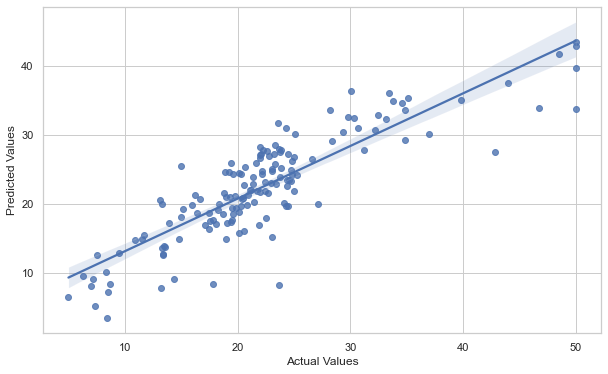

In [53]:
plt.figure(figsize=(10,6))
sns.regplot(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [54]:
# residuals
residual = y_test - reg_pred

<AxesSubplot:xlabel='Price', ylabel='Density'>

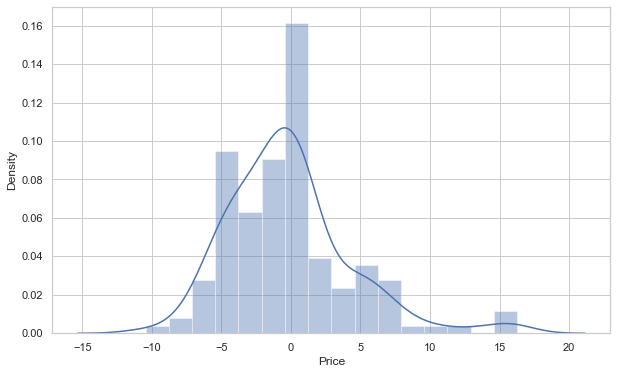

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(residual)

In [56]:
# evaluating performance metrics

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
print('mean absolute error:', mean_absolute_error(y_test, reg_pred))
print('mean squared error:', mean_squared_error(y_test, reg_pred))
score = r2_score(y_test, reg_pred)
print('regression score value:', score)

mean absolute error: 3.2131078984434738
mean squared error: 19.640981886598507
regression score value: 0.7478323908278403


- R-squared(R^2) always increases as we add more predictors to a model
- Adjusted R^2 can serve as a metric that tells us how useful a model is (adjusted for the number of predictors in a model)

In [59]:
# adjusted r-squared = 1 – [((1 – R2) * (n – 1)) / (n – k – 1)]
# n = no. of rows in test dataset & k = no. of columns in test dataset

In [60]:
n = len(y_test)
k = X_test.shape[1]

adj_rsq = 1 - (((1 - score)*(n-1)) / (n-k-1))
print('adjusted r-squared:', adj_rsq)

adjusted r-squared: 0.7240774711232165


In [61]:
details = {
    'Metrics': ['Mean Absolute Error', 'Mean Squared Error', 'Adjusted R-squared', 'Model Accuracy'],
    'Values': [mean_absolute_error(y_test, reg_pred), mean_squared_error(y_test, reg_pred), adj_rsq, r2_score(y_test, reg_pred)*100]
}

In [62]:
performance_table_simple = pd.DataFrame(details)

In [63]:
performance_table_simple

,Metrics,Values
0,Mean Absolute Error,3.213108
1,Mean Squared Error,19.640982
2,Adjusted R-squared,0.724077
3,Model Accuracy,74.783239


#### PART II: APPLYING LINEAR REGRESSION ALGORITHM TO THE SCALED DATA

In [64]:
# scaling the train/test data using StandardScaler
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

When we call *StandardScaler.fit(X_train)*, what it does is calculate the mean and variance from the values in X_train. Then calling *.transform()* function will transform all of the features by subtracting the mean and dividing by the variance. For convenience these two function calls are done in one step using *fit_transform()* function. The reason we want to fit the scaler using only the training data is because we don't want to bias our model with information from the test data.

If we apply the *fit()* function to our test data, it would result in computing **a new mean** and **variance for each feature**. Theoretically, these values might be very similar if our test and train sets have the same distribution, but in practice this is typically not the case. Instead, we prefer applying only the *transform()* function to our test data by using the parameters computed on the training data.

In [66]:
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
X_train_scaled

array([[ 4.73752760e+00, -4.69490291e-01,  9.85165483e-01, ...,
         7.85081643e-01, -3.02439751e+00,  3.41650458e+00],
       [-4.11304761e-01,  8.12843070e-01,  5.38321507e-01, ...,
        -1.38543819e-01,  4.18408973e-01, -6.21897669e-01],
       [-4.03569808e-01, -4.69490291e-01,  3.70389947e-01, ...,
        -9.69806736e-01,  4.39622067e-01,  7.45722245e-01],
       ...,
       [ 4.48258500e-01, -4.69490291e-01,  9.85165483e-01, ...,
         7.85081643e-01,  3.96971403e-01,  1.02597223e+00],
       [-2.72576927e-01, -4.69490291e-01,  1.20128610e+00, ...,
        -1.75488838e+00, -2.11137273e-01, -9.94630146e-01],
       [-1.66656558e-03, -4.69490291e-01,  9.85165483e-01, ...,
         7.85081643e-01,  2.58805700e-01, -3.37443937e-01]])

In [68]:
X_test_scaled = scaler.transform(X_test)

In [69]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
311,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.65665,20.0,3.97,0.0,0.647,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60


In [70]:
lreg_scaled = LinearRegression()

In [71]:
lreg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [72]:
print('Intercept:', lreg_scaled.intercept_)

Intercept: 22.607344632768363


In [73]:
print(lreg_scaled.coef_)

[-0.87463533  1.09850088  0.09492089  0.51820668 -2.7256652   2.18139301
  0.98763247 -3.17175916  3.08111997 -2.18587526 -2.23040688  0.75233175
 -4.50334868]


In [74]:
summary_table_scaled = pd.DataFrame(columns=['Features'], data=feature_names)

In [75]:
summary_table_scaled['Coefficients'] = np.transpose(lreg_scaled.coef_)

In [76]:
summary_table_scaled.index = summary_table_scaled.index + 1
summary_table_scaled.loc[0] = ['Intercept', lreg_scaled.intercept_]
summary_table_scaled = summary_table_scaled.sort_index()
summary_table_scaled

,Features,Coefficients
0,Intercept,22.607345
1,CRIM,-0.874635
2,ZN,1.098501
3,INDUS,0.094921
4,CHAS,0.518207
5,NOX,-2.725665
6,RM,2.181393
7,AGE,0.987632
8,DIS,-3.171759
9,RAD,3.081120


In [77]:
pred_scaled = lreg_scaled.predict(X_test_scaled)

In [78]:
pred_scaled

array([14.86476259, 27.16743485, 19.45228983, 24.6663324 , 25.8441451 ,
       27.43823062, 22.62574732, 28.51297403, 22.70449416, 41.69450064,
       32.27747185, 21.32130327, 10.17185565, 22.96897676,  5.22770493,
       27.1965765 , 12.53382381, 32.41455626, 20.63702772, 17.01851689,
       30.67897216, 20.77368739, 12.82337394, 33.54936671, 25.3970719 ,
       20.93496928, 26.92225626, 21.53311655, 32.55791744, 32.84409782,
       19.35641995, 25.85513296, 27.82016333, 15.2031168 , 21.6022154 ,
       27.59430833, 14.85376813, 17.20799858, 18.76953597, 20.92928019,
        9.11248337, 18.70794065, 19.65254133, 19.9372306 , 17.42226863,
       15.81615905, 19.87112034, 16.92893429, 20.5129663 , 13.70200725,
       25.83532634, 20.31444606, 34.91919438, 16.30535192, 16.96743944,
       27.96988769, 17.17099701, 17.97321546, 23.36827899, 27.17982327,
       19.78559583, 20.18399801, 30.9473558 , 19.13871935,  6.49679778,
       42.87235281, 24.88952383, 43.36512251, 35.35137848, 28.25

Text(0, 0.5, 'Predicted Values')

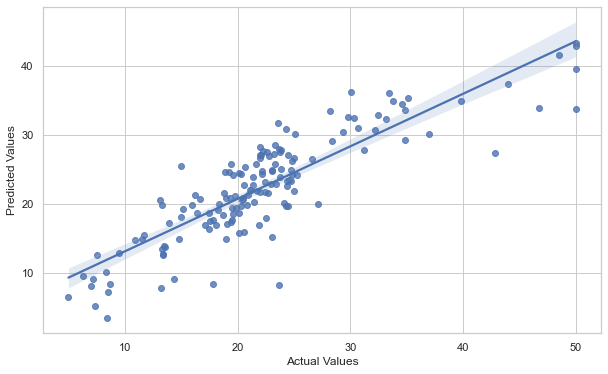

In [79]:
plt.figure(figsize=(10,6))
sns.regplot(y_test, pred_scaled)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [80]:
residual_scaled = y_test - pred_scaled
residual_scaled

27    -0.064763
311   -5.067435
105    0.047710
117   -5.466332
66    -6.444145
         ...   
259   -6.220032
501   -0.737462
32     5.387899
288   -5.429940
399   -3.285739
Name: Price, Length: 152, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

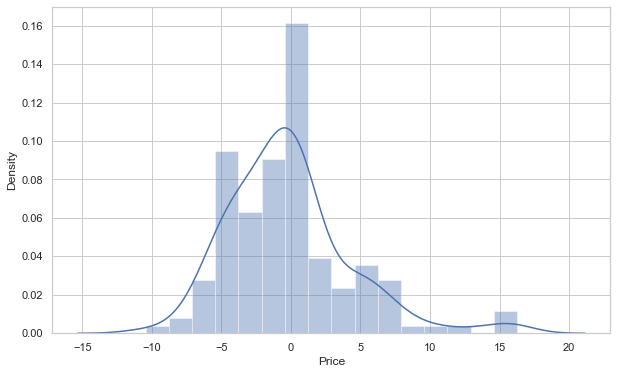

In [81]:
plt.figure(figsize=(10,6))
sns.distplot(residual_scaled)

In [82]:
# evaluating performance metrics for scaled data

In [83]:
print('Performance metrics for scaled data:')
print('mean absolute error:', mean_absolute_error(y_test, pred_scaled))
print('mean squared error:', mean_squared_error(y_test, pred_scaled))
print('R-squared error:', r2_score(y_test, pred_scaled))

Performance metrics for scaled data:
mean absolute error: 3.2131078984434738
mean squared error: 19.640981886598457
R-squared error: 0.7478323908278408


In [84]:
adj_rsq_scaled = 1 - (((1 - (r2_score(y_test, pred_scaled)))*(n-1)) / (n-k-1))
print('adjusted R-squared:', adj_rsq_scaled)

adjusted R-squared: 0.7240774711232172


##### There is no such significant change between the normal and scaled R-squared value

In [85]:
details = {
    'Metrics': ['Mean Absolute Error', 'Mean Squared Error', 'Adjusted R-squared', 'Model Accuracy', ],
    'Values': [mean_absolute_error(y_test, pred_scaled), mean_squared_error(y_test, pred_scaled), adj_rsq_scaled, r2_score(y_test, pred_scaled)*100]
}

In [86]:
performance_table_scaled = pd.DataFrame(details)

In [87]:
performance_table_scaled

,Metrics,Values
0,Mean Absolute Error,3.213108
1,Mean Squared Error,19.640982
2,Adjusted R-squared,0.724077
3,Model Accuracy,74.783239


#### PART III: APPLYING LASSO REGRESSION ALGORITHM TO THE NORMAL (NON-SCALED) DATA

In [88]:
from sklearn.linear_model import Lasso

In [89]:
lasso = Lasso()

In [90]:
lasso.fit(X_train, y_train)

Lasso()

In [91]:
print('Intercept:', lasso.intercept_)

Intercept: 44.26283558113383


In [92]:
print(lasso.coef_)

[-0.04767589  0.05234284 -0.          0.         -0.          0.2677262
  0.05707693 -0.52789965  0.28781666 -0.01626584 -0.72054164  0.00781487
 -0.8971133 ]


In [93]:
summary_table_lasso = pd.DataFrame(columns=['Features'], data=feature_names)

In [94]:
summary_table_lasso['Coefficients'] = np.transpose(lasso.coef_)

In [95]:
summary_table_lasso.index = summary_table_lasso.index + 1
summary_table_lasso.loc[0] = ['Intercept', lasso.intercept_]
summary_table_lasso = summary_table_lasso.sort_index()
summary_table_lasso

,Features,Coefficients
0,Intercept,44.262836
1,CRIM,-0.047676
2,ZN,0.052343
3,INDUS,-0.000000
4,CHAS,0.000000
5,NOX,-0.000000
6,RM,0.267726
7,AGE,0.057077
8,DIS,-0.527900
9,RAD,0.287817


In [96]:
pred_lasso = lasso.predict(X_test)

Text(0, 0.5, 'Predicted Values')

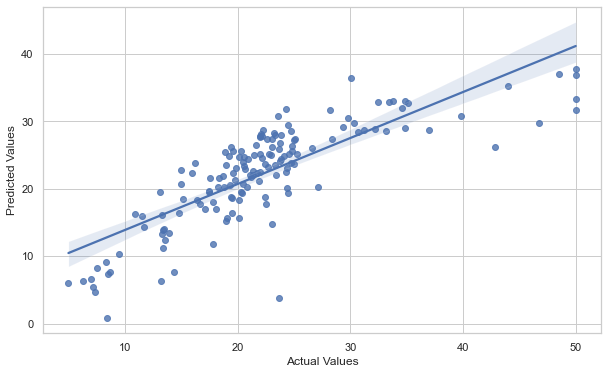

In [97]:
plt.figure(figsize=(10,6))
sns.regplot(y_test, pred_lasso)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [98]:
residual_lasso = y_test - pred_lasso
residual_lasso

27    -1.672174
311   -6.069490
105    0.832239
117   -5.649014
66    -6.866631
         ...   
259   -6.307075
501   -1.364666
32     6.851370
288   -6.422977
399    0.018886
Name: Price, Length: 152, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

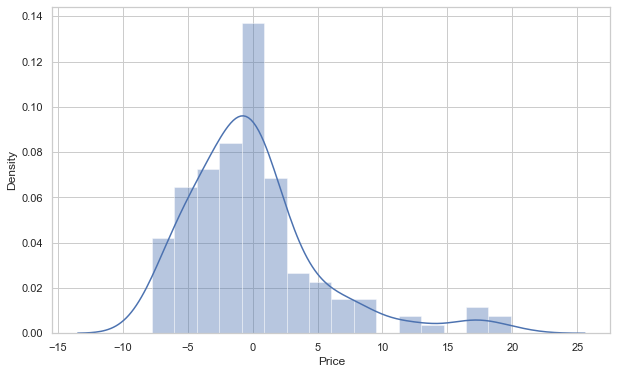

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(residual_lasso)

In [100]:
print('Performance metrics for data using Lasso Regression:')
print('mean absolute error:', mean_absolute_error(y_test, pred_lasso))
print('mean squared error:', mean_squared_error(y_test, pred_lasso))
print('R-squared error:', r2_score(y_test, pred_lasso))
adj_rsq_lasso = 1 - (((1 - (r2_score(y_test, pred_lasso)))*(n-1)) / (n-k-1))
print('adjusted R-squared:', adj_rsq_lasso)

Performance metrics for data using Lasso Regression:
mean absolute error: 3.645749091115165
mean squared error: 26.868894624220463
R-squared error: 0.6550343074695555
adjusted R-squared: 0.6225375393326296


In [101]:
details = {
    'Metrics': ['Mean Absolute Error', 'Mean Squared Error', 'Adjusted R-squared', 'Model Accuracy'],
    'Values': [mean_absolute_error(y_test, pred_lasso), mean_squared_error(y_test, pred_lasso), adj_rsq_lasso,r2_score(y_test, pred_lasso)*100]
}

In [102]:
performance_table_lasso = pd.DataFrame(details)

In [103]:
performance_table_lasso

,Metrics,Values
0,Mean Absolute Error,3.645749
1,Mean Squared Error,26.868895
2,Adjusted R-squared,0.622538
3,Model Accuracy,65.503431


#### PART IV: APPLYING ELASTICNET REGRESSION ALGORITHM TO THE NORMAL (NON-SCALED) DATA

In [104]:
from sklearn.linear_model import ElasticNet

In [105]:
elastic_net = ElasticNet()

In [106]:
elastic_net.fit(X_train, y_train)

ElasticNet()

In [107]:
print('Intercept:', elastic_net.intercept_)

Intercept: 42.17720090642313


In [108]:
print(elastic_net.coef_)

[-0.06485868  0.05503173 -0.03078234  0.         -0.          0.70361732
  0.0518957  -0.67717167  0.31066652 -0.01675701 -0.72397265  0.00820375
 -0.85327681]


In [109]:
summary_table_ElasticNet = pd.DataFrame(columns=['Features'], data=feature_names)

In [110]:
summary_table_ElasticNet['Coefficients'] = np.transpose(elastic_net.coef_)

In [111]:
summary_table_ElasticNet.index = summary_table_ElasticNet.index + 1
summary_table_ElasticNet.loc[0] = ['Intercept', elastic_net.intercept_]
summary_table_ElasticNet = summary_table_ElasticNet.sort_index()
summary_table_ElasticNet

,Features,Coefficients
0,Intercept,42.177201
1,CRIM,-0.064859
2,ZN,0.055032
3,INDUS,-0.030782
4,CHAS,0.000000
5,NOX,-0.000000
6,RM,0.703617
7,AGE,0.051896
8,DIS,-0.677172
9,RAD,0.310667


In [112]:
pred_elastic_net = elastic_net.predict(X_test)

Text(0, 0.5, 'Predicted Values')

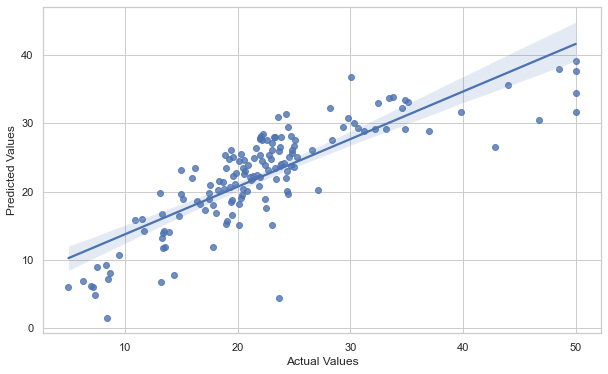

In [113]:
plt.figure(figsize=(10,6))
sns.regplot(y_test, pred_elastic_net)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [114]:
residual_elastic_net = y_test - pred_elastic_net
residual_elastic_net

27    -1.575719
311   -5.961805
105    0.719620
117   -5.507849
66    -6.739940
         ...   
259   -6.700695
501   -1.449589
32     6.464605
288   -6.161829
399   -0.688946
Name: Price, Length: 152, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

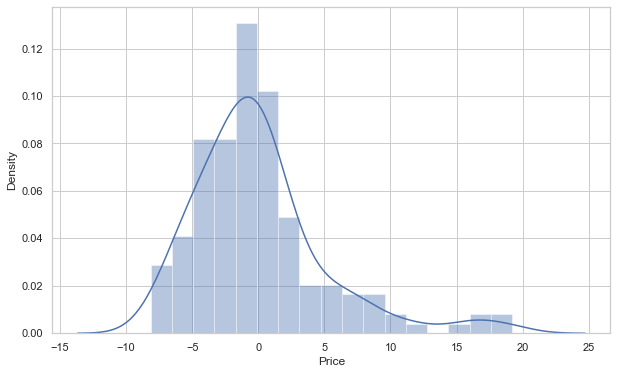

In [115]:
plt.figure(figsize=(10,6))
sns.distplot(residual_elastic_net)

In [116]:
print('Performance metrics for data using ElasticNet Regression:')
print('mean absolute error:', mean_absolute_error(y_test, pred_elastic_net))
print('mean squared error:', mean_squared_error(y_test, pred_elastic_net))
print('R-squared error:', r2_score(y_test, pred_elastic_net))
adj_rsq_elastic_net = 1 - (((1 - (r2_score(y_test, pred_elastic_net)))*(n-1)) / (n-k-1))
print('adjusted R-squared:', adj_rsq_elastic_net)

Performance metrics for data using ElasticNet Regression:
mean absolute error: 3.5273540322828985
mean squared error: 25.085814153499584
R-squared error: 0.6779270091613202
adjusted R-squared: 0.6475867998794156


In [117]:
details = {
    'Metrics': ['Mean Absolute Error', 'Mean Squared Error', 'Adjusted R-squared', 'Model Accuracy'],
    'Values': [mean_absolute_error(y_test, pred_elastic_net), mean_squared_error(y_test, pred_elastic_net), adj_rsq_elastic_net,r2_score(y_test, pred_elastic_net)*100]
}

In [118]:
performance_table_ElasticNet = pd.DataFrame(details)

In [119]:
performance_table_ElasticNet

,Metrics,Values
0,Mean Absolute Error,3.527354
1,Mean Squared Error,25.085814
2,Adjusted R-squared,0.647587
3,Model Accuracy,67.792701


#### PART V: APPLYING XGBOOST REGRESSION ALGORITHM TO THE NORMAL (NON-SCALED) DATA

In [120]:
from xgboost import XGBRegressor

In [121]:
xgb = XGBRegressor()

In [122]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [123]:
# predicting on training data
training_data_prediction = xgb.predict(X_train)
training_data_prediction

array([ 7.003241 , 22.904081 , 21.495625 , 22.501245 , 20.599926 ,
       22.19591  , 31.502512 , 50.0031   , 23.105005 , 21.6125   ,
       16.496458 , 13.802605 , 15.606338 , 36.497658 , 14.004596 ,
       20.379286 , 50.00198  , 44.806244 , 32.399628 , 42.299877 ,
       49.997547 , 15.386134 , 10.903534 , 35.185738 , 22.811178 ,
       19.894686 , 13.842327 , 24.394491 , 33.19589  , 15.609047 ,
       18.367668 , 20.386974 , 20.898216 , 28.099054 , 16.126314 ,
       21.899502 , 33.001125 , 18.737976 , 13.795007 , 22.010284 ,
       15.6079   , 48.281265 , 22.595673 , 18.60381  , 16.501127 ,
       29.599247 , 18.600567 , 19.489767 , 14.501543 , 12.787881 ,
       19.305573 , 20.122173 , 32.696903 , 14.491257 , 20.59292  ,
       29.003477 , 21.20007  , 23.905136 , 14.310311 , 24.404408 ,
       26.392054 , 10.499052 , 17.413523 , 20.991098 , 21.700184 ,
       23.001516 , 24.695845 , 28.519358 , 20.297558 , 19.204216 ,
        8.400509 ,  8.305792 , 37.201977 , 25.001972 , 17.4050

In [124]:
print('Performance metrics for training data using XGBoost Regression:')
print('mean absolute error:', mean_absolute_error(y_train, training_data_prediction))
print('mean squared error:', mean_squared_error(y_train, training_data_prediction))
print('R-squared error:', r2_score(y_train, training_data_prediction))

Performance metrics for training data using XGBoost Regression:
mean absolute error: 0.008223626573206974
mean squared error: 0.000159547007108267
R-squared error: 0.9999981704439662


In [125]:
# predicting on test data
test_data_prediction = xgb.predict(X_test)

In [126]:
print('Performance metrics for test data using XGBoost Regression:')
print('mean absolute error:', mean_absolute_error(y_test, test_data_prediction))
print('mean squared error:', mean_squared_error(y_test, test_data_prediction))
print('R-squared error:', r2_score(y_test, test_data_prediction))
adj_rsq_xgb = 1 - (((1 - (r2_score(y_test, test_data_prediction)))*(n-1)) / (n-k-1))
print('adjusted R-squared:', adj_rsq_xgb)

Performance metrics for test data using XGBoost Regression:
mean absolute error: 2.364938545854468
mean squared error: 12.002369900685435
R-squared error: 0.8459033799974703
adjusted R-squared: 0.8313870317363625


Text(0, 0.5, 'Predicted Values')

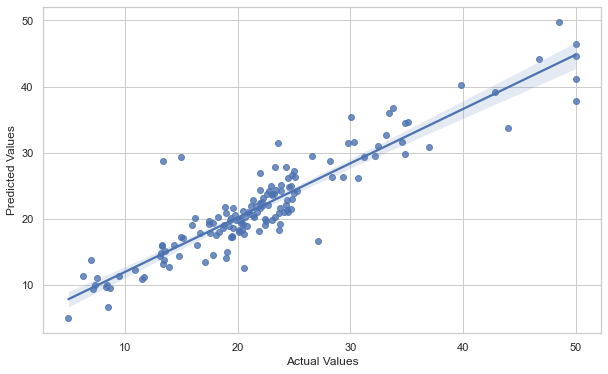

In [127]:
plt.figure(figsize=(10,6))
sns.regplot(y_test, test_data_prediction);
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<AxesSubplot:xlabel='Price', ylabel='Density'>

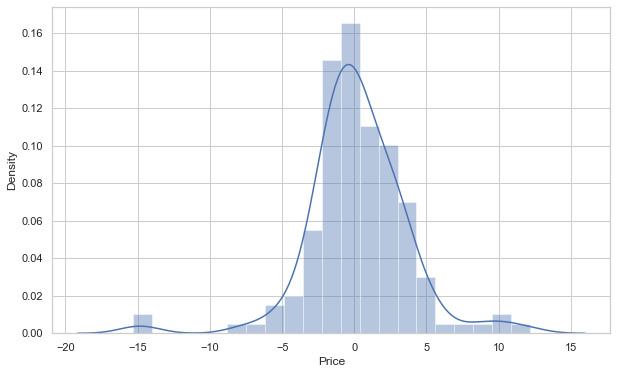

In [128]:
plt.figure(figsize=(10,6))
residual_xgb = y_test - test_data_prediction
sns.distplot(residual_xgb)

In [129]:
details = {
    'Metrics': ['Mean Absolute Error', 'Mean Squared Error', 'Adjusted R-squared', 'Model Accuracy'],
    'Values': [mean_absolute_error(y_test, test_data_prediction), mean_squared_error(y_test, test_data_prediction), adj_rsq_xgb, r2_score(y_test, test_data_prediction)*100]
}

In [130]:
performance_table_XGBoost = pd.DataFrame(details)

In [131]:
performance_table_XGBoost

,Metrics,Values
0,Mean Absolute Error,2.364939
1,Mean Squared Error,12.002370
2,Adjusted R-squared,0.831387
3,Model Accuracy,84.590338


In [132]:
# merging all the performance summary tables

In [133]:
overall_performance = pd.concat([performance_table_simple,
                                performance_table_scaled,
                                performance_table_lasso,
                                performance_table_ElasticNet,
                                performance_table_XGBoost], axis=1)

In [134]:
overall_performance.columns

Index(['Metrics', 'Values', 'Metrics', 'Values', 'Metrics', 'Values',
       'Metrics', 'Values', 'Metrics', 'Values'],
      dtype='object')

In [135]:
overall_performance.columns = ['Metrics', 'Linear Regression', 'Metrics_1', 'Scaled Linear Regression', 'Metrics_2', 'Lasso Regression', 'Metrics_3', 'ElasticNet Regression', 'Metrics_4', 'XGBoost Regression']

In [136]:
overall_performance_summary = overall_performance.drop(['Metrics_1', 'Metrics_2', 'Metrics_3', 'Metrics_4'], axis=1)

In [137]:
overall_performance_summary

,Metrics,Linear Regression,Scaled Linear Regression,Lasso Regression,ElasticNet Regression,XGBoost Regression
0,Mean Absolute Error,3.213108,3.213108,3.645749,3.527354,2.364939
1,Mean Squared Error,19.640982,19.640982,26.868895,25.085814,12.002370
2,Adjusted R-squared,0.724077,0.724077,0.622538,0.647587,0.831387
3,Model Accuracy,74.783239,74.783239,65.503431,67.792701,84.590338


In [140]:
# the XGB Regressor model is based on decision trees & provides a parallel tree boosting
# the MAE, MSE and Model Accuracy metrics are comparatively better for XGB Regressor model
# so we would be using the XGB Regressor model to predict the prices for houses 

In [141]:
import pickle

In [142]:
pickle.dump(xgb,open('xgb_model.pkl','wb'))